C:\Users\hskma\AppData\Local\Temp\ipykernel_12440\2153864861.py:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, pd.DataFrame([row])], ignore_index=True)


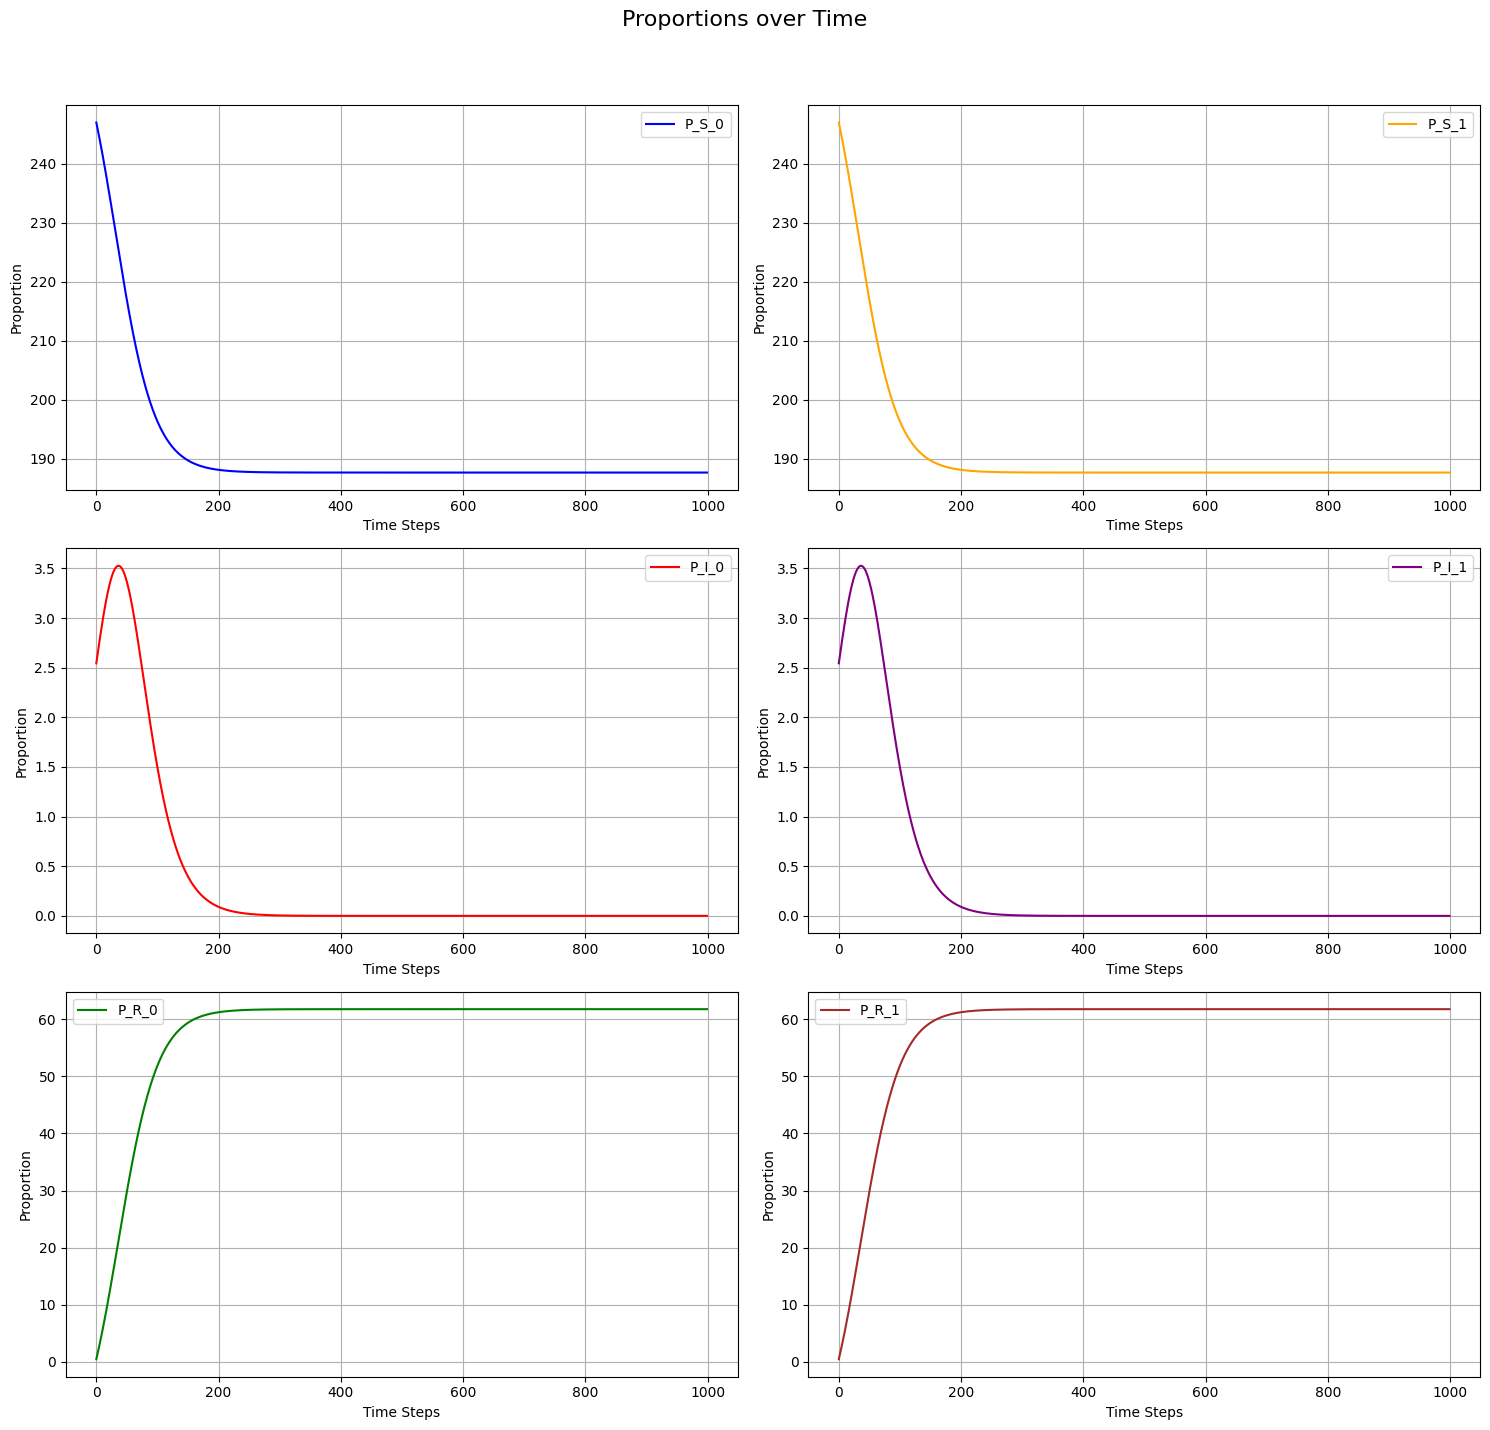

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

N = 500
int_I = 0.01 * N
int_R = 0
int_S = N - int_I - int_R  # S_0 is starting susceptible
beta = 0.2
gamma = 0.03
MaxTime = 1000
RunTime = np.linspace(0, MaxTime, MaxTime)

# Initial values (using float type for consistency)
initial_values = {
    'P_S_0': int_S / 2,
    'P_S_1': int_S / 2,
    'P_I_0': int_I / 2,
    'P_I_1': int_I / 2,
    'P_R_0': int_R / 2,
    'P_R_1': int_R / 2
}

# Equations for updating proportions
def update_proportions_S(row, beta, N):
    new_S_0 = row['P_S_0'] - (beta * row['P_S_0'] * (row['P_I_0'] + row['P_I_1']) / N)
    new_S_1 = row['P_S_1'] - (beta * row['P_S_1'] * (row['P_I_0'] + row['P_I_1']) / N)
    row['P_S_0'] = new_S_0
    row['P_S_1'] = new_S_1
    return row

def update_proportions_I(row, beta, gamma, N):
    new_I_0 = row['P_I_0'] + (beta * row['P_S_0'] * (row['P_I_0'] + row['P_I_1']) / N) - (6 * gamma * row['P_I_0'])
    new_I_1 = row['P_I_1'] + (beta * row['P_S_1'] * (row['P_I_0'] + row['P_I_1']) / N) - (6 * gamma * row['P_I_1'])
    row['P_I_0'] = new_I_0
    row['P_I_1'] = new_I_1
    return row

def update_proportions_R(row, gamma):
    new_R_0 = row['P_R_0'] + (3 * gamma * (row['P_I_0'] + row['P_I_1']))
    new_R_1 = row['P_R_1'] + (3 * gamma * (row['P_I_0'] + row['P_I_1']))
    row['P_R_0'] = new_R_0
    row['P_R_1'] = new_R_1
    return row

def run_simulation(initial_values, beta, gamma, steps, N):
    data = pd.DataFrame(columns=['P_S_0', 'P_S_1', 'P_I_0', 'P_I_1', 'P_R_0', 'P_R_1'])
    row = initial_values.copy()

    for _ in range(steps):
        row = update_proportions_S(row, beta, N)
        row = update_proportions_I(row, beta, gamma, N)
        row = update_proportions_R(row, gamma)
        data = pd.concat([data, pd.DataFrame([row])], ignore_index=True)

    return data

def plot_simulation(data):
    fig, axes = plt.subplots(3, 2, figsize=(15, 15))
    fig.suptitle('Proportions over Time', fontsize=16)

    axes[0, 0].plot(data['P_S_0'], label='P_S_0', color='blue')
    axes[0, 0].set_xlabel('Time Steps')
    axes[0, 0].set_ylabel('Proportion')
    axes[0, 0].legend()
    axes[0, 0].grid(True)

    axes[0, 1].plot(data['P_S_1'], label='P_S_1', color='orange')
    axes[0, 1].set_xlabel('Time Steps')
    axes[0, 1].set_ylabel('Proportion')
    axes[0, 1].legend()
    axes[0, 1].grid(True)

    axes[1, 0].plot(data['P_I_0'], label='P_I_0', color='red')
    axes[1, 0].set_xlabel('Time Steps')
    axes[1, 0].set_ylabel('Proportion')
    axes[1, 0].legend()
    axes[1, 0].grid(True)

    axes[1, 1].plot(data['P_I_1'], label='P_I_1', color='purple')
    axes[1, 1].set_xlabel('Time Steps')
    axes[1, 1].set_ylabel('Proportion')
    axes[1, 1].legend()
    axes[1, 1].grid(True)

    axes[2, 0].plot(data['P_R_0'], label='P_R_0', color='green')
    axes[2, 0].set_xlabel('Time Steps')
    axes[2, 0].set_ylabel('Proportion')
    axes[2, 0].legend()
    axes[2, 0].grid(True)

    axes[2, 1].plot(data['P_R_1'], label='P_R_1', color='brown')
    axes[2, 1].set_xlabel('Time Steps')
    axes[2, 1].set_ylabel('Proportion')
    axes[2, 1].legend()
    axes[2, 1].grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Run simulation
data = run_simulation(initial_values, beta, gamma, MaxTime, N)

# Plot the results
plot_simulation(data)
